In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Hate Content Detection.csv")

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.shape

(24783, 7)

In [6]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [11]:
df=df.drop(["Unnamed: 0","count","neither"],axis=1)
df.head()

,hate_speech,offensive_language,class,tweet
0,0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,3,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,3,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,2,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


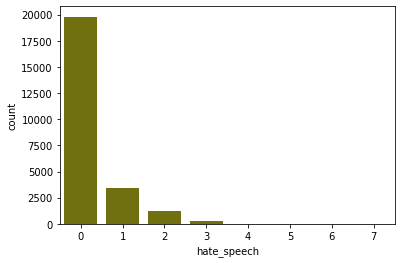

In [7]:
sns.countplot(x="hate_speech",data=df,color="olive")

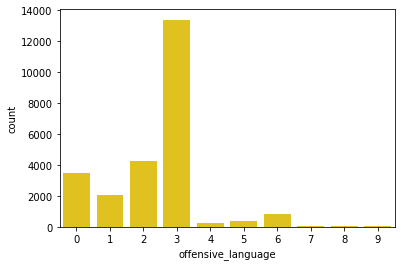

In [8]:
sns.countplot(x="offensive_language",data=df,color="gold")

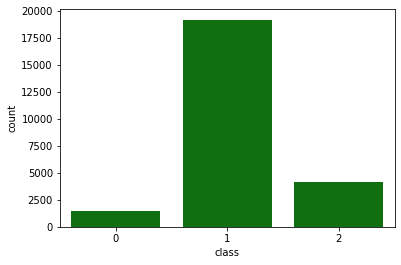

In [10]:
sns.countplot(x="class",data=df,color="green")

In [16]:
df.columns=["Hate Speech Level","Offensive Language","Class","Text"]

In [13]:
import string
import nltk
import re

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
sw=nltk.corpus.stopwords.words("english")
sw[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Creating Bag Of Words Using TF-IDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words=sw,max_features=20)
x=tfidf.fit_transform(df["Text"])

In [19]:
x

<24783x20 sparse matrix of type '<class 'numpy.float64'>'
	with 47029 stored elements in Compressed Sparse Row format>

In [20]:
x_new=x.toarray()
x_new

array([[0.        , 0.        , 0.        , ..., 0.47977048, 0.        ,
        0.87739403],
       [0.        , 0.        , 0.        , ..., 0.52819772, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5981586 , 0.53551037,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
y=df["Class"].to_numpy()
y

array([2, 1, 1, ..., 1, 1, 2])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Applying K Nearest Neighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=15)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [31]:
y_preds_knn=model_knn.predict(x_test)

In [67]:
acc_knn=accuracy_score(y_test,y_preds_knn)
acc_knn

0.8182368367964494

In [70]:
cm_knn=confusion_matrix(y_test,y_preds_knn)
cm_knn

array([[   5,  236,   38],
       [  10, 3744,   98],
       [   7,  512,  307]])

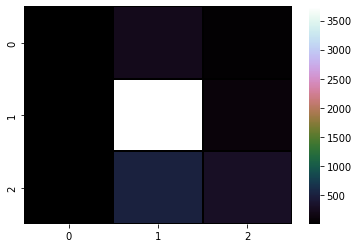

In [71]:
sns.heatmap(cm_knn,linewidth=1,linecolor="black",cmap="cubehelix")

Applying Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
y_preds_rf=model_rf.predict(x_test)

In [75]:
acc_rf=accuracy_score(y_test,y_preds_rf)
acc_rf

0.8333669558200525

In [77]:
cm_rf=confusion_matrix(y_test,y_preds_rf)
cm_rf

array([[   6,  106,  167],
       [  11, 3359,  482],
       [   1,   59,  766]])

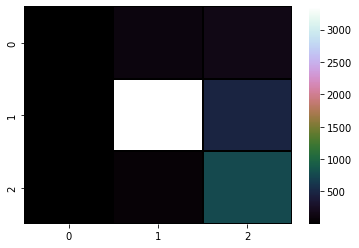

In [78]:
sns.heatmap(cm_rf,linewidth=1,linecolor="black",cmap="cubehelix")